**Ecuación logística:**
$$ \dfrac{dx}{dt}=r x (1-x) $$

**Solución analítica**
$$ x(t)=\dfrac{1}{1+(\dfrac{1}{x_0}-1)e^{rt}} $$

## Solución numérica

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
from ipywidgets import interact
sns.set()
%matplotlib inline

In [43]:
def ecuacion(x,t,r):
    return r*x*(1-x)
tiempo=np.linspace(0,10,100)

In [44]:
def f(r,x0):
    sol=odeint(ecuacion,x0,tiempo,args=(r,)) #Cuando es un solo parámetro se pone una coma
    x=sol.T[0]
    plt.plot(tiempo,x,label="Posición numérica")
    plt.legend();
    plt.show()
interact(f,r=(0,5),x0=(.1,10))

interactive(children=(IntSlider(value=2, description='r', max=5), FloatSlider(value=5.05, description='x0', ma…

<function __main__.f(r, x0)>

## Gráfica analítica

In [25]:
x1=(1+(1/x0 -1)*np.exp(-r*tiempo))**-1

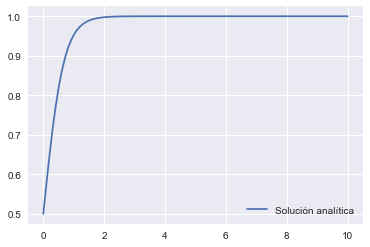

In [27]:
plt.plot(tiempo,x1,label="Solución analítica")
plt.legend();

## Con plotly

In [52]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

trace1=go.Scatter(x=tiempo,y=x1)
py.offline.iplot([trace1], filename = 'Ecuación logística')

# Mapa logístico

$$ {x_{k+1}=r x_k(1-x_k)} $$

Primero analizamos lo que pasa si discretizamos y cambiamos la r

In [62]:
def mapa_logistico(r,x):
    return r*x*(1-x)

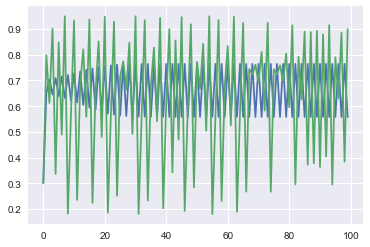

In [68]:
r,r1=3.1,3.8
n=100
x=np.zeros(n)
x[0]=.3
x1=np.zeros(n)
x1[0]=.3
for i in range(n-1):
    x[i+1]=mapa_logistico(r,x[i])
for i in range(n-1):
    x1[i+1]=mapa_logistico(r1,x1[i])

plt.plot(np.arange(0,n),x)
plt.plot(np.arange(0,n),x1)

## Con plotly

In [71]:
def plot(r,r1):    
    n=100
    x=np.zeros(n)
    x[0]=.3
    x1=np.zeros(n)
    x1[0]=.3
    for i in range(n-1):
        x[i+1]=mapa_logistico(r,x[i])
    for i in range(n-1):
        x1[i+1]=mapa_logistico(r1,x1[i])
    trace2=go.Scatter(x=np.arange(0,n),y=x)
    trace3=go.Scatter(x=np.arange(0,n),y=x1)
    py.offline.iplot([trace2,trace3], filename = 'Mapa Logístico')

interact(plot,r=(.2,4,.2),r1=(.2,4,.2))

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, min=0.2, step=0.2), FloatSlider(value=2…

<function __main__.plot(r, r1)>

$$ x_{k+1}=x_{k}+T(r x_k(1-x_k)) $$

In [74]:
def plot2(r,x0):    
    n=10000
    x=np.zeros(n)
    x[0]=x0
    for i in range(n-1):
        x[i+1]=x[i]+.001*mapa_logistico(r,x[i])
    trace4=go.Scatter(x=np.arange(0,n),y=x)
    py.offline.iplot([trace4], filename = 'Mapa Logístico')

interact(plot2,r=(.2,4,.2),x0=(.1,10,.1))

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, min=0.2, step=0.2), FloatSlider(value=5…

<function __main__.plot2(r, x0)>